In [1]:
import pandas as pd
basketball = pd.read_csv('https://raw.githubusercontent.com/evapanizo/IronHack-Data-Module-2/master/27.-Network-Analysis/data/us_mens_basketball.csv', sep=',')

In [317]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [318]:
# pip install networkx
import networkx as nx
# pip install python-louvain
import community
import pandas as pd

# 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

In [319]:
basketball.Team.unique()

array(['United States'], dtype=object)

In [320]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [321]:
# verifying if all games unique values represent the city
basketball[['City', 'Sport','Games']].query('City == "Berlin"')

,City,Sport,Games
12,Berlin,Basketball,1936 Summer
25,Berlin,Basketball,1936 Summer
72,Berlin,Basketball,1936 Summer
77,Berlin,Basketball,1936 Summer
110,Berlin,Basketball,1936 Summer
128,Berlin,Basketball,1936 Summer
140,Berlin,Basketball,1936 Summer
155,Berlin,Basketball,1936 Summer
169,Berlin,Basketball,1936 Summer
175,Berlin,Basketball,1936 Summer


In [322]:
def df_to_graph(df, entity, edge):
    ''' Transform a dataframe into another dataframe suitable to work with graphs.'''
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{entity}_x', f'{entity}_y']).count().reset_index()
    graph_df = graph_df.query(f'{entity}_x != {entity}_y')

    if type(edge) == list:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y', edge]]
    
    return graph_df.rename(columns={f'{entity}_x':f'{entity}_src', 
                                    f'{entity}_y':f'{entity}_dest'})



In [323]:
graph_df = df_to_graph(basketball, 'Name', 'Games')
graph_df.head()

,Name_src,Name_dest,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1


# 2. Use the from_pandas_edgelist method to turn the data frame into a graph.

In [324]:
G = nx.from_pandas_edgelist(graph_df, source='Name_src', target='Name_dest')

In [325]:
G.size()

1232

In [326]:
G.degree()

DegreeView({'Adrian Delano Dantley': 11, 'Ernest "Ernie" Grunfeld': 11, 'Kenneth Alan "Kenny" Carr': 11, 'Michel Taylor "Tate" Armstrong': 11, 'Mitchell William "Mitch" Kupchak': 11, 'Philip Jackson "Phil" Ford, Jr.': 11, 'Phillip Gregory "Phil" Hubbard': 11, 'Scott Glenn May': 11, 'Steven Bernard "Steve" Sheppard': 11, 'Thomas Joseph "Tom" LaGarde': 11, 'Walter Paul Davis': 11, 'William Quinn Buckner': 11, 'Adrian Howard Smith': 11, 'Burdette Eliele "Burdie" Haldorson': 22, 'Darrall Tucker Imhoff': 11, 'Earl Allen Kelley': 11, 'Jay Joseph Hoyland Arnette': 11, 'Jerome Alan "Jerry" West': 11, 'Jerry Ray Lucas': 11, 'Lester Everett "Les" Lane': 11, 'Oscar Palmer Robertson': 11, 'Robert Lewis "Bob" Boozer': 11, 'Terence Gilbert "Terry" Dischinger': 11, 'Walter Jones "Walt" Bellamy, Jr.': 11, 'Alexander John "Alex" Groza': 13, 'Clifford Eugene "Cliff" Barker': 13, 'Donald Argee "Don" Barksdale': 13, 'Gordon C. Carpenter': 13, 'Jesse Banard Renick': 13, 'Kenneth Herman "Kenny" Rollins': 13

In [327]:
G.order()

196

In [328]:
nx.density(G)

0.06446886446886448

In [329]:
nx.betweenness_centrality(G, weight='edge')

{'Adrian Delano Dantley': 0.0,
 'Ernest "Ernie" Grunfeld': 0.0,
 'Kenneth Alan "Kenny" Carr': 0.0,
 'Michel Taylor "Tate" Armstrong': 0.0,
 'Mitchell William "Mitch" Kupchak': 0.0,
 'Philip Jackson "Phil" Ford, Jr.': 0.0,
 'Phillip Gregory "Phil" Hubbard': 0.0,
 'Scott Glenn May': 0.0,
 'Steven Bernard "Steve" Sheppard': 0.0,
 'Thomas Joseph "Tom" LaGarde': 0.0,
 'Walter Paul Davis': 0.0,
 'William Quinn Buckner': 0.0,
 'Adrian Howard Smith': 0.0,
 'Burdette Eliele "Burdie" Haldorson': 0.021517314300819455,
 'Darrall Tucker Imhoff': 0.0,
 'Earl Allen Kelley': 0.0,
 'Jay Joseph Hoyland Arnette': 0.0,
 'Jerome Alan "Jerry" West': 0.0,
 'Jerry Ray Lucas': 0.0,
 'Lester Everett "Les" Lane': 0.0,
 'Oscar Palmer Robertson': 0.0,
 'Robert Lewis "Bob" Boozer': 0.0,
 'Terence Gilbert "Terry" Dischinger': 0.0,
 'Walter Jones "Walt" Bellamy, Jr.': 0.0,
 'Alexander John "Alex" Groza': 0.0,
 'Clifford Eugene "Cliff" Barker': 0.0,
 'Donald Argee "Don" Barksdale': 0.0,
 'Gordon C. Carpenter': 0.0,
 '

# 3. Compute and print the following graph statistics for the graph:¶


* Number of nodes
* Number of edges
* Average degree
* Density

In [330]:
# Number of nodes: 
len(list(G.nodes))

196

In [331]:
G.number_of_nodes()

196

In [332]:
# Number of edges: 
G.size()

1232

In [333]:
len(list(G.edges))

1232

In [334]:
G.number_of_edges()

1232

In [335]:
# Average degree
sum(dict(G.degree).values()) / G.number_of_nodes()

12.571428571428571

In [336]:
# Density
nx.density(G)

0.06446886446886448

In [337]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

Number of nodes: 196
Number of edges: 1232
Average degree: 12.571428571428571
Density: 0.06446886446886448


# 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [338]:
betweenness = pd.DataFrame.from_dict(nx.betweenness_centrality(G), 
                       orient='index').sort_values(by=0, ascending=False).reset_index()
betweenness.columns = ['node','betweenness_cent']
betweenness.head()

,node,betweenness_cent
0,Gary Dwayne Payton,0.091938
1,Jason Frederick Kidd,0.091356
2,Carmelo Kyan Anthony,0.047423
3,David Maurice Robinson,0.032662
4,"William Marion ""Bill"" Hougland",0.030241


# 5. Compute PageRank centrality for the graph and print the top 5 nodes with the highest centrality.

In [339]:
page_rank = pd.DataFrame.from_dict(nx.pagerank(G), 
                       orient='index').sort_values(by=0, ascending=False).reset_index()
page_rank.columns = ['node','page_rank']
page_rank.head()

,node,page_rank
0,Carmelo Kyan Anthony,0.012578
1,David Maurice Robinson,0.009965
2,"Robert Albert ""Bob"" Kurland",0.009114
3,LeBron Raymone James,0.009085
4,"William Marion ""Bill"" Hougland",0.008851


# 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.¶


In [340]:
degree_cent = pd.DataFrame.from_dict(nx.degree_centrality(G), 
                                     orient='index').sort_values(by=0, ascending=False).reset_index()
degree_cent.columns = ['node','degree_cent']
degree_cent.head()

,node,degree_cent
0,Carmelo Kyan Anthony,0.184615
1,David Maurice Robinson,0.143590
2,"Robert Albert ""Bob"" Kurland",0.133333
3,LeBron Raymone James,0.133333
4,"William Marion ""Bill"" Hougland",0.123077


# 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

Look for nx.draw_kamada_kawai for reference. 


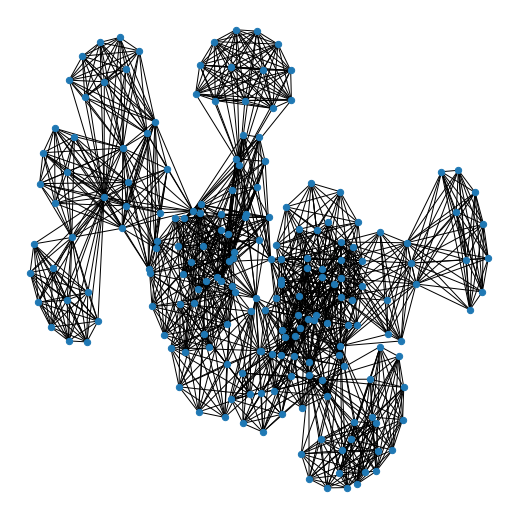

In [341]:
nx.draw_kamada_kawai(G, node_size = 40)

# 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

nx.ego_graph will help you visualize a graph centered at some node.

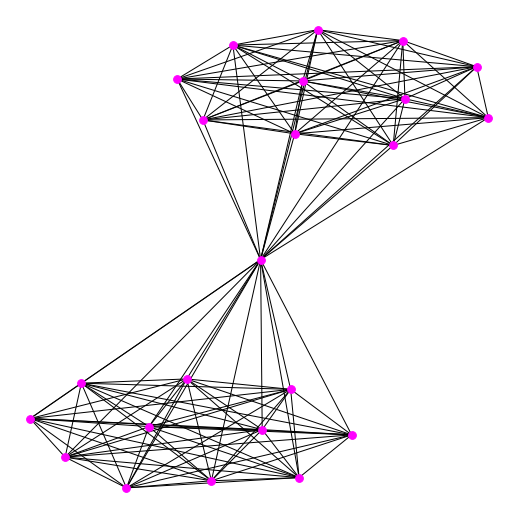

In [342]:
nx.draw_spring(nx.ego_graph(G, betweenness.loc[0,'node'],radius=1), 
                    node_size = 60,
                    node_color='magenta')

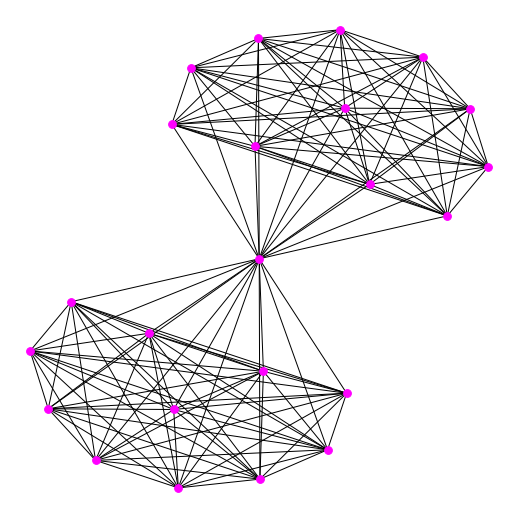

In [343]:
nx.draw_kamada_kawai(nx.ego_graph(G, betweenness.loc[0,'node'],radius=1), 
                    node_size = 60,
                    node_color='magenta')

# 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.


In [344]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,7)

In [345]:
pos = nx.kamada_kawai_layout(G)

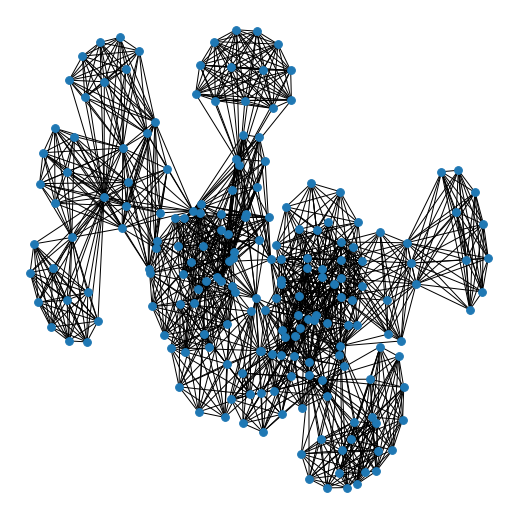

In [346]:
nx.draw(G, pos=pos, node_size = 60)
plt.show()

In [347]:
communities = nx.community.girvan_newman(G)

In [348]:
community = next(communities)
community

({'Adrian Delano Dantley',
  'Ernest "Ernie" Grunfeld',
  'Kenneth Alan "Kenny" Carr',
  'Michel Taylor "Tate" Armstrong',
  'Mitchell William "Mitch" Kupchak',
  'Philip Jackson "Phil" Ford, Jr.',
  'Phillip Gregory "Phil" Hubbard',
  'Scott Glenn May',
  'Steven Bernard "Steve" Sheppard',
  'Thomas Joseph "Tom" LaGarde',
  'Walter Paul Davis',
  'William Quinn Buckner'},
 {'Adrian Howard Smith',
  'Alexander John "Alex" Groza',
  'Burdette Eliele "Burdie" Haldorson',
  'Carl Cecil Cain',
  'Charles Frick "Chuck" Darling',
  'Charles Monroe "Charlie" Hoag',
  'Clifford Eugene "Cliff" Barker',
  'Clyde Edward Lovellette',
  'Dan Luther Pippin',
  'Darrall Tucker Imhoff',
  'Donald Argee "Don" Barksdale',
  'Earl Allen Kelley',
  'Frank Reilly McCabe',
  'Gilbert "Gib" Ford',
  'Gordon C. Carpenter',
  'Howard Earl "Howie" Williams',
  'James Patrick "Jim" Walsh',
  'Jay Joseph Hoyland Arnette',
  'Jerome Alan "Jerry" West',
  'Jerry Ray Lucas',
  'Jesse Banard Renick',
  'John Frederic

In [349]:
len(community)

8

In [350]:
colors = ['black', 'red', 'magenta', 'green', 'purple', 'blue', 'yellow', 'orange','cyan']
len(colors)

9

In [351]:
community[0]

{'Adrian Delano Dantley',
 'Ernest "Ernie" Grunfeld',
 'Kenneth Alan "Kenny" Carr',
 'Michel Taylor "Tate" Armstrong',
 'Mitchell William "Mitch" Kupchak',
 'Philip Jackson "Phil" Ford, Jr.',
 'Phillip Gregory "Phil" Hubbard',
 'Scott Glenn May',
 'Steven Bernard "Steve" Sheppard',
 'Thomas Joseph "Tom" LaGarde',
 'Walter Paul Davis',
 'William Quinn Buckner'}

In [352]:
node_color = dict()
for i in range (len(community)):
#    print(i)
    for node in community[i]:
        node_color[node] = colors[i]
#    print(node_color)

node_color = [node_color[node] for node in node_color]

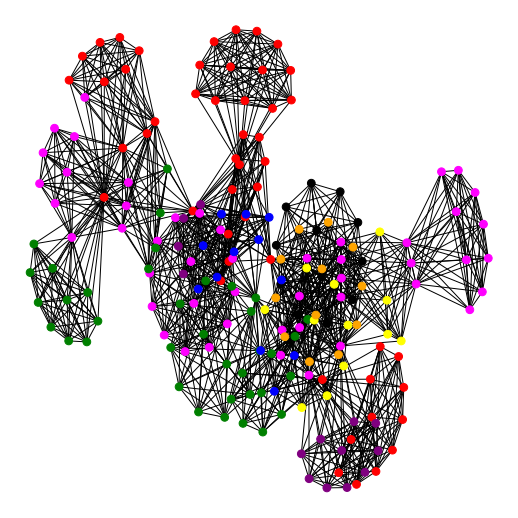

In [353]:
nx.draw(G, pos=pos, node_color=node_color, node_size = 60)
plt.show()

In [354]:
# USING COMMUNITY 

import community as cm

In [355]:
best_part = cm.best_partition(G, random_state=6)
best_part

{'Adrian Delano Dantley': 0,
 'Ernest "Ernie" Grunfeld': 0,
 'Kenneth Alan "Kenny" Carr': 0,
 'Michel Taylor "Tate" Armstrong': 0,
 'Mitchell William "Mitch" Kupchak': 0,
 'Philip Jackson "Phil" Ford, Jr.': 0,
 'Phillip Gregory "Phil" Hubbard': 0,
 'Scott Glenn May': 0,
 'Steven Bernard "Steve" Sheppard': 0,
 'Thomas Joseph "Tom" LaGarde': 0,
 'Walter Paul Davis': 0,
 'William Quinn Buckner': 0,
 'Adrian Howard Smith': 1,
 'Burdette Eliele "Burdie" Haldorson': 1,
 'Darrall Tucker Imhoff': 1,
 'Earl Allen Kelley': 1,
 'Jay Joseph Hoyland Arnette': 1,
 'Jerome Alan "Jerry" West': 1,
 'Jerry Ray Lucas': 1,
 'Lester Everett "Les" Lane': 1,
 'Oscar Palmer Robertson': 1,
 'Robert Lewis "Bob" Boozer': 1,
 'Terence Gilbert "Terry" Dischinger': 1,
 'Walter Jones "Walt" Bellamy, Jr.': 1,
 'Alexander John "Alex" Groza': 2,
 'Clifford Eugene "Cliff" Barker': 2,
 'Donald Argee "Don" Barksdale': 2,
 'Gordon C. Carpenter': 2,
 'Jesse Banard Renick': 2,
 'Kenneth Herman "Kenny" Rollins': 2,
 'Lewis Wi

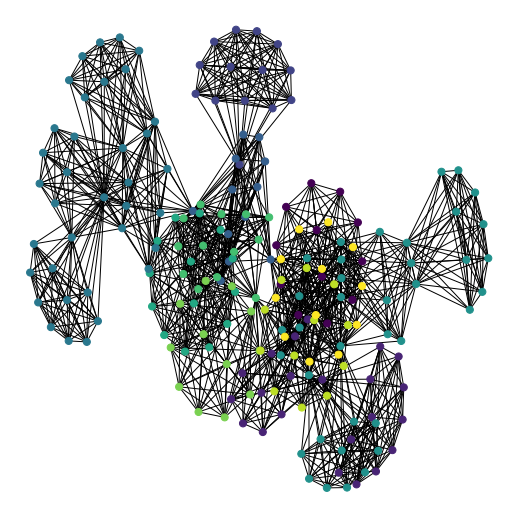

In [356]:
nx.draw(G, 
        pos=pos, 
        node_size = 50,
        node_color=[value for value in best_part.values()])

plt.show()

## Playing with layouts

In [373]:
layouts = {'circular' : nx.circular_layout(G), 
          'kamada_kawai' : nx.kamada_kawai_layout(G), 
          'shell' : nx.shell_layout(G), 
          'spring' : nx.spring_layout(G), 
          'spectral' : nx.spectral_layout(G)}

In [374]:
len(layouts)

5

In [382]:
layouts['circular']

{'Adrian Delano Dantley': array([1.00000000e+00, 3.89014824e-10]),
 'Ernest "Ernie" Grunfeld': array([0.99948621, 0.03205158]),
 'Kenneth Alan "Kenny" Carr': array([0.99794537, 0.06407023]),
 'Michel Taylor "Tate" Armstrong': array([0.99537909, 0.09602302]),
 'Mitchell William "Mitch" Kupchak': array([0.99179   , 0.12787716]),
 'Philip Jackson "Phil" Ford, Jr.': array([0.98718178, 0.1595999 ]),
 'Phillip Gregory "Phil" Hubbard': array([0.98155916, 0.19115862]),
 'Scott Glenn May': array([0.9749279 , 0.22252093]),
 'Steven Bernard "Steve" Sheppard': array([0.96729487, 0.2536546 ]),
 'Thomas Joseph "Tom" LaGarde': array([0.95866787, 0.28452757]),
 'Walter Paul Davis': array([0.94905573, 0.31510821]),
 'William Quinn Buckner': array([0.9384684 , 0.34536505]),
 'Adrian Howard Smith': array([0.92691678, 0.375267  ]),
 'Burdette Eliele "Burdie" Haldorson': array([0.91441262, 0.40478334]),
 'Darrall Tucker Imhoff': array([0.90096885, 0.43388376]),
 'Earl Allen Kelley': array([0.8865993, 0.462

In [383]:
list(layouts.keys())[0]

'circular'

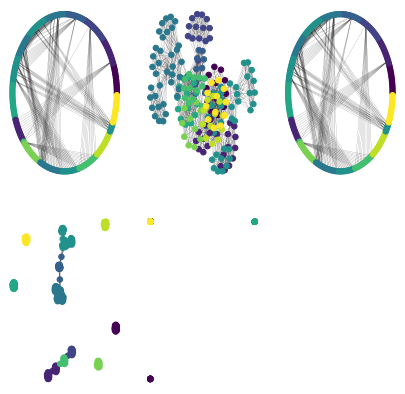

In [400]:
grid = nx.grid_graph([2,3])

for i in range(len(list(layouts.keys()))):
    pos = layouts[list(layouts.keys())[i]]
    plt.subplot(231+i)
    nx.draw(G, pos=pos, node_size = node_size, node_color=node_color, width =width)

plt.show()

In [394]:
list(layouts.keys())[0]

'circular'

In [398]:
node_size = 30
node_color = [value for value in best_part.values()]
width = 0.1

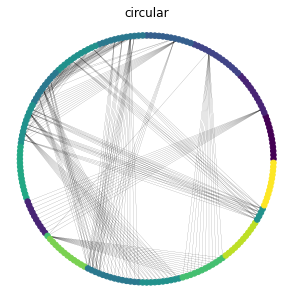

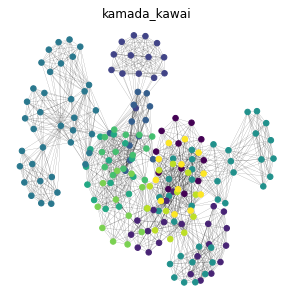

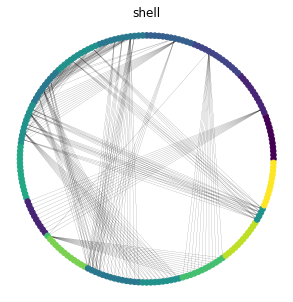

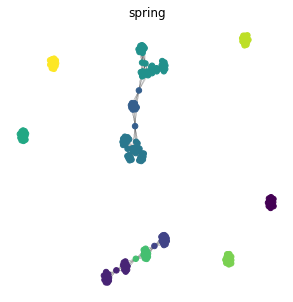

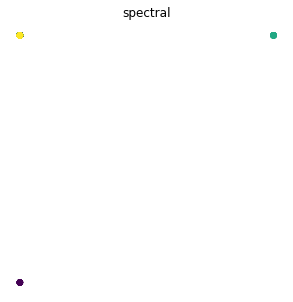

In [399]:
for i in range(len(list(layouts.keys()))):
    pos = layouts[list(layouts.keys())[i]]
    plt.figure(i+1, figsize=(5,5)) 
    plt.title(list(layouts.keys())[i])
    nx.draw(G, pos=pos, node_size = node_size, node_color=node_color, width=width)

plt.show()